# Data Science Capstone Project - New London Restaurant

### Jupyter notebook for Coursera 'IBM Data Science Professional' certificate capstone project, final assignment

In [26]:
#import libraries
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup
print('Libraries imported')

Libraries imported


In [32]:
import types
from botocore.client import Config
import ibm_boto3

In [43]:
# The code was removed by Watson Studio for sharing.

In [49]:
#import, read and explore London borough names file

def __iter__(self): return 0

CLIENT = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=AUTH_KEY_ID,
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = CLIENT.get_object(Bucket='ibmdatascienceprofessionalcapston-donotdelete-pr-vrcsttbn9t293v',Key='London_Boroughs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

boroughs = pd.read_csv(body)
boroughs.head()

,Postcode,Borough
0,E1,"Whitechapel, Stepney, Mile End"
1,E1W,Wapping
2,E2,"Bethnal Green, Shoreditch"
3,E3,"Bow, Bromley-by-Bow"
4,E4,"Chingford, Highams Park"


In [45]:
boroughs.shape

(119, 2)

In [50]:
# import, read and explore London postcodes latitude / longitude file

def __iter__(self): return 0


CLIENT = ibm_boto3.client(service_name='s3',
    ibm_api_key_id= AUTH_KEY_ID,
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = CLIENT.get_object(Bucket='ibmdatascienceprofessionalcapston-donotdelete-pr-vrcsttbn9t293v',Key='London_Postcodesv2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

postcodes_geo = pd.read_csv(body)
postcodes_geo.head()

,id,postcode,latitude,longitude
0,730,E1,51.51766,-0.05841
1,731,E10,51.56814,-0.01153
2,732,E11,51.56769,0.01443
3,733,E12,51.54992,0.05404
4,734,E13,51.52700,0.02705


In [51]:
postcodes_geo.shape

(119, 4)

In [52]:
# clean up by dropping id
postcodes_geo.drop(['id'], axis=1, inplace=True)
postcodes_geo.head()

,postcode,latitude,longitude
0,E1,51.51766,-0.05841
1,E10,51.56814,-0.01153
2,E11,51.56769,0.01443
3,E12,51.54992,0.05404
4,E13,51.52700,0.02705


In [53]:
# merge the data-sets

london_data = (pd.merge(boroughs, postcodes_geo, left_on='Postcode', right_on='postcode', how = 'left')).drop(columns='postcode')
london_data.head()

,Postcode,Borough,latitude,longitude
0,E1,"Whitechapel, Stepney, Mile End",51.51766,-0.05841
1,E1W,Wapping,51.50775,-0.05739
2,E2,"Bethnal Green, Shoreditch",51.52939,-0.06080
3,E3,"Bow, Bromley-by-Bow",51.52789,-0.02482
4,E4,"Chingford, Highams Park",51.62196,-0.00339


In [54]:
london_data.shape

(119, 4)

In [56]:
# additional libraries to import

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [57]:
# The code was removed by Watson Studio for sharing.

In [58]:
# function to explore neighborhoods

LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [61]:
# explore London boroughs

london_venues = getNearbyVenues(names=london_data['Borough'],
                                   latitudes=london_data['latitude'],
                                   longitudes=london_data['longitude']
                                  )

Whitechapel, Stepney, Mile End
Wapping
Bethnal Green, Shoreditch
Bow, Bromley-by-Bow
Chingford, Highams Park
Clapton
East Ham
Forest Gate, Upton Park
Hackney, Dalston
Hackney, Homerton
Leyton
Leytonstone
Manor Park
Plaistow
Poplar, Millwall, Isle of Dogs, Docklands
Stratford, West Ham
Canning Town, North Woolwich, Docklands
Walthamstow
South Woodford
Olympic Park
Bloomsbury, Grays Inn
Covent Garden, Holborn, Strand
Clerkenwell, Finsbury, Barbican
Moorgate, Liverpool Street
Monument, Tower Hill, Aldgate
Fleet Street, St. Pauls
Islington, Barnsbury, Canonbury
East Finchley
Finchley Central
Finsbury Park, Manor House
Highbury
Highgate
Holloway
Hornsey, Crouch End
Lower Edmonton
Muswell Hill
Friern Barnet, New Southgate
North Finchley, Woodside Park
Palmers Green
Southgate
Seven Sisters
Stoke Newington, Stamford Hill
Tottenham
Upper Edmonton
Archway, Tufnell Park
Whetstone, Totteridge
Winchmore Hill
Wood Green, Alexandra Palace
Regents Park, Camden Town
Cricklewood, Neasden
Hampstead, Swis

In [62]:
print(london_venues.shape)
london_venues.head()

(1967, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Whitechapel, Stepney, Mile End",51.51766,-0.05841,Mouse Tail Coffee Stories,51.519471,-0.058573,Coffee Shop
1,"Whitechapel, Stepney, Mile End",51.51766,-0.05841,New Road Hotel,51.517575,-0.062658,Hotel
2,"Whitechapel, Stepney, Mile End",51.51766,-0.05841,Needoo Grill,51.517070,-0.062379,Indian Restaurant
3,"Whitechapel, Stepney, Mile End",51.51766,-0.05841,play on,51.518902,-0.056459,Recreation Center
4,"Whitechapel, Stepney, Mile End",51.51766,-0.05841,LHT Urban Bar,51.519255,-0.058999,Pub


In [64]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,4,4,4,4,4,4
Acton,10,10,10,10,10,10
"Archway, Tufnell Park",7,7,7,7,7,7
Balham,26,26,26,26,26,26
"Barnes, Castelnau",16,16,16,16,16,16
"Battersea, Clapham Junction",14,14,14,14,14,14
"Bayswater, Paddington",63,63,63,63,63,63
"Bethnal Green, Shoreditch",17,17,17,17,17,17
"Bloomsbury, Grays Inn",7,7,7,7,7,7


In [65]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 241 uniques categories.


In [66]:
# insert matplotlib

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.0.2


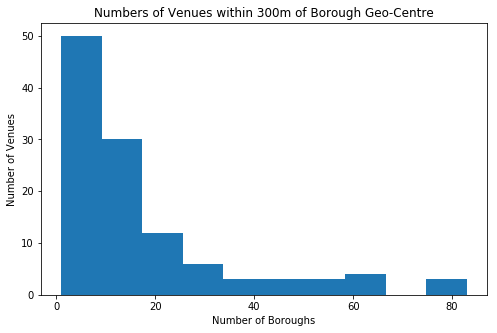

In [67]:
# plot histogram of venue counts

(london_venues.groupby('Neighborhood').count())['Venue'].plot(kind='hist', figsize=(8, 5))

plt.title('Numbers of Venues within 300m of Borough Geo-Centre') # add a title to the histogram
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Number of Boroughs') # add x-label

plt.show()

In [68]:
# neighborhoods analysis

# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add 'Neighborhood' column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move 'Neighborhood' to first column
col = london_onehot.pop("Neighborhood")
london_onehot.insert(0, col.name, col)


london_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Himalayan Restaurant,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoothie Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Whitechapel, Stepney, Mile End",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped.head()

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Himalayan Restaurant,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoothie Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0

In [70]:
london_grouped.shape

(114, 241)

In [71]:
# enter into pandas dataframe and display top 10 venues for each neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Coffee Shop,Bakery,Café,Platform,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
1,Acton,Gym / Fitness Center,Pub,Coffee Shop,Creperie,Grocery Store,Japanese Restaurant,Wine Shop,Food & Drink Shop,Flower Shop,Flea Market
2,"Archway, Tufnell Park",Coffee Shop,Thai Restaurant,Park,Bus Stop,Café,Grocery Store,Food Truck,Food Court,Food & Drink Shop,Flower Shop
3,Balham,Coffee Shop,Pizza Place,Indian Restaurant,Supermarket,Beer Store,Italian Restaurant,Gym,Fast Food Restaurant,Portuguese Restaurant,Restaurant
4,"Barnes, Castelnau",Farmers Market,Café,French Restaurant,Lake,Park,Movie Theater,Thai Restaurant,Community Center,Bakery,Bookstore


In [72]:
# run K-means to cluster the neighborhoods

# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_.shape
kmeans.labels_

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3, 0, 3, 3, 0, 3, 0, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 0], dtype=int32)

In [73]:
london_data.head()

,Postcode,Borough,latitude,longitude
0,E1,"Whitechapel, Stepney, Mile End",51.51766,-0.05841
1,E1W,Wapping,51.50775,-0.05739
2,E2,"Bethnal Green, Shoreditch",51.52939,-0.06080
3,E3,"Bow, Bromley-by-Bow",51.52789,-0.02482
4,E4,"Chingford, Highams Park",51.62196,-0.00339


In [74]:
# allocate clustering labels to the top-10 venues list

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Abbey Wood,Coffee Shop,Bakery,Café,Platform,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
1,0,Acton,Gym / Fitness Center,Pub,Coffee Shop,Creperie,Grocery Store,Japanese Restaurant,Wine Shop,Food & Drink Shop,Flower Shop,Flea Market
2,3,"Archway, Tufnell Park",Coffee Shop,Thai Restaurant,Park,Bus Stop,Café,Grocery Store,Food Truck,Food Court,Food & Drink Shop,Flower Shop
3,3,Balham,Coffee Shop,Pizza Place,Indian Restaurant,Supermarket,Beer Store,Italian Restaurant,Gym,Fast Food Restaurant,Portuguese Restaurant,Restaurant
4,3,"Barnes, Castelnau",Farmers Market,Café,French Restaurant,Lake,Park,Movie Theater,Thai Restaurant,Community Center,Bakery,Bookstore
5,3,"Battersea, Clapham Junction",Supermarket,Pub,Café,Train Station,Pizza Place,Vietnamese Restaurant,Coffee Shop,Pharmacy,Fish & Chips Shop,Chinese Restaurant
6,3,"Bayswater, Paddington",Hotel,Café,Coffee Shop,Italian Restaurant,Pub,Sandwich Place,Malay Restaurant,Outdoor Sculpture,Food Court,Souvenir Shop
7,3,"Bethnal Green, Shoreditch",Grocery Store,Coffee Shop,Fast Food Restaurant,Sandwich Place,Park,Falafel Restaurant,Bar,Convenience Store,Pizza Place,Social Club
8,3,"Bloomsbury, Grays Inn",Coffee Shop,Bookstore,Cocktail Bar,Garden,Wine Bar,Office,Yoga Studio,Fast Food Restaurant,Fish & Chips Shop,Fish Market
9,0,"Bow, Bromley-by-Bow",Burger Joint,Metro Station,Rental Car Location,Coffee Shop,Bus Stop,Pub,Hostel,Food Truck,Food & Drink Shop,Flower Shop


In [75]:
# merge london_grouped with london_data to add latitude/longitude for each neighborhood

london_merged = (pd.merge(london_data, neighborhoods_venues_sorted, left_on='Borough', right_on='Neighborhood')).drop('Neighborhood', 1)

london_merged.head(112)

,Postcode,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,E1,"Whitechapel, Stepney, Mile End",51.517660,-0.058410,0,Pub,Coffee Shop,Asian Restaurant,Gym / Fitness Center,Outdoor Sculpture,Bakery,Fish & Chips Shop,Market,Cafeteria,Hotel
1,E1W,Wapping,51.507750,-0.057390,3,Indian Restaurant,Bar,Convenience Store,Event Space,Park,Nightclub,Market,Grocery Store,Pool,Italian Restaurant
2,E2,"Bethnal Green, Shoreditch",51.529390,-0.060800,3,Grocery Store,Coffee Shop,Fast Food Restaurant,Sandwich Place,Park,Falafel Restaurant,Bar,Convenience Store,Pizza Place,Social Club
3,E3,"Bow, Bromley-by-Bow",51.527890,-0.024820,0,Burger Joint,Metro Station,Rental Car Location,Coffee Shop,Bus Stop,Pub,Hostel,Food Truck,Food & Drink Shop,Flower Shop
4,E4,"Chingford, Highams Park",51.621960,-0.003390,3,Home Service,Yoga Studio,Exhibit,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
5,E5,Clapton,51.558930,-0.052330,0,Intersection,Café,Gym / Fitness Center,Pub,Department Store,Design Studio,Food Truck,Food Court,Food & Drink Shop,Flower Shop
6,E6,East Ham,51.525600,0.055830,3,Grocery Store,Café,Sandwich Place,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
7,E7,"Forest Gate, Upton Park",51.546780,0.027930,3,Fast Food Restaurant,Grocery Store,Bus Stop,Fish & Chips Shop,Bakery,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court
8,E8,"Hackney, Dalston",51.542020,-0.063150,3,Pool,Park,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
9,E9,"Hackney, Homerton",51.542580,-0.042930,0,Pub,Park,Deli / Bodega,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market


In [76]:
# obtain lat/long for London

address = 'London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [77]:
#visualise the clustering

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
london_merged.loc[london_merged['Cluster Labels'] == 3]

,Postcode,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,E1W,Wapping,51.507750,-0.057390,3,Indian Restaurant,Bar,Convenience Store,Event Space,Park,Nightclub,Market,Grocery Store,Pool,Italian Restaurant
2,E2,"Bethnal Green, Shoreditch",51.529390,-0.060800,3,Grocery Store,Coffee Shop,Fast Food Restaurant,Sandwich Place,Park,Falafel Restaurant,Bar,Convenience Store,Pizza Place,Social Club
4,E4,"Chingford, Highams Park",51.621960,-0.003390,3,Home Service,Yoga Studio,Exhibit,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
6,E6,East Ham,51.525600,0.055830,3,Grocery Store,Café,Sandwich Place,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
7,E7,"Forest Gate, Upton Park",51.546780,0.027930,3,Fast Food Restaurant,Grocery Store,Bus Stop,Fish & Chips Shop,Bakery,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court
8,E8,"Hackney, Dalston",51.542020,-0.063150,3,Pool,Park,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
10,E10,Leyton,51.568140,-0.011530,3,Cricket Ground,Convenience Store,Park,Farm,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop
12,E12,Manor Park,51.549920,0.054040,3,Restaurant,Asian Restaurant,Yoga Studio,Exhibit,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
13,E13,Plaistow,51.527000,0.027050,3,Café,Park,Grocery Store,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
14,E14,"Poplar, Millwall, Isle of Dogs, Docklands",51.506200,-0.018550,3,Coffee Shop,Sandwich Place,Burger Joint,Café,French Restaurant,Sushi Restaurant,Shopping Mall,Bar,Bakery,Plaza


In [79]:
# filter down to target boroughs in Cluster 3 but which do not have 'Indian '

london_merged_target = london_merged.loc[(london_merged['Cluster Labels'] == 3) & (london_merged['1st Most Common Venue'] != 'Indian Restaurant') & (london_merged['2nd Most Common Venue'] != 'Indian Restaurant') & 
                  (london_merged['3rd Most Common Venue'] != 'Indian Restaurant') & (london_merged['4th Most Common Venue'] != 'Indian Restaurant') & (london_merged['5th Most Common Venue'] != 'Indian Restaurant')
                  & (london_merged['6th Most Common Venue'] != 'Indian Restaurant') & (london_merged['7th Most Common Venue'] != 'Indian Restaurant') & (london_merged['8th Most Common Venue'] != 'Indian Restaurant')
                  & (london_merged['9th Most Common Venue'] != 'Indian Restaurant') & (london_merged['10th Most Common Venue'] != 'Indian Restaurant')]

london_merged_target

,Postcode,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,E2,"Bethnal Green, Shoreditch",51.529390,-0.060800,3,Grocery Store,Coffee Shop,Fast Food Restaurant,Sandwich Place,Park,Falafel Restaurant,Bar,Convenience Store,Pizza Place,Social Club
4,E4,"Chingford, Highams Park",51.621960,-0.003390,3,Home Service,Yoga Studio,Exhibit,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
6,E6,East Ham,51.525600,0.055830,3,Grocery Store,Café,Sandwich Place,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
7,E7,"Forest Gate, Upton Park",51.546780,0.027930,3,Fast Food Restaurant,Grocery Store,Bus Stop,Fish & Chips Shop,Bakery,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court
8,E8,"Hackney, Dalston",51.542020,-0.063150,3,Pool,Park,Yoga Studio,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
10,E10,Leyton,51.568140,-0.011530,3,Cricket Ground,Convenience Store,Park,Farm,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop
12,E12,Manor Park,51.549920,0.054040,3,Restaurant,Asian Restaurant,Yoga Studio,Exhibit,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
13,E13,Plaistow,51.527000,0.027050,3,Café,Park,Grocery Store,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
14,E14,"Poplar, Millwall, Isle of Dogs, Docklands",51.506200,-0.018550,3,Coffee Shop,Sandwich Place,Burger Joint,Café,French Restaurant,Sushi Restaurant,Shopping Mall,Bar,Bakery,Plaza
18,E18,South Woodford,51.591760,0.027050,3,Grocery Store,Greek Restaurant,Bar,Supermarket,Metro Station,BBQ Joint,Fast Food Restaurant,Pub,Dessert Shop,Café


In [80]:
# filter further to target boroughs which do not have 'Restaurant' in any of their top 10 most common venues.

london_merged_target_2 = london_merged_target[~london_merged_target['1st Most Common Venue'].str.contains("Restaurant")]

london_merged_target_3 = london_merged_target_2[~london_merged_target_2['2nd Most Common Venue'].str.contains("Restaurant")]

london_merged_target_4 = london_merged_target_3[~london_merged_target_3['3rd Most Common Venue'].str.contains("Restaurant")]

london_merged_target_5 = london_merged_target_4[~london_merged_target_4['4th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_6 = london_merged_target_5[~london_merged_target_5['5th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_7 = london_merged_target_6[~london_merged_target_6['6th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_8 = london_merged_target_7[~london_merged_target_7['7th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_9 = london_merged_target_8[~london_merged_target_8['8th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_10 = london_merged_target_9[~london_merged_target_9['9th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_final = london_merged_target_10[~london_merged_target_10['10th Most Common Venue'].str.contains("Restaurant")]

london_merged_target_final

,Postcode,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,E6,East Ham,51.52560,0.05583,3,Grocery Store,Café,Sandwich Place,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
10,E10,Leyton,51.56814,-0.01153,3,Cricket Ground,Convenience Store,Park,Farm,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop
13,E13,Plaistow,51.52700,0.02705,3,Café,Park,Grocery Store,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
26,N1,"Islington, Barnsbury, Canonbury",51.53717,-0.09652,3,Bakery,Pub,Park,Yoga Studio,Record Shop,Convenience Store,Organic Grocery,Fish Market,Café,Burger Joint
66,SE12,"Lee, Grove Park",51.44430,0.02483,3,Home Service,Park,Yoga Studio,Exhibit,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
78,SE24,Herne Hill,51.45446,-0.09853,3,Café,Deli / Bodega,Platform,Gourmet Shop,Pet Store,Pizza Place,Pub,Discount Store,Diner,Food Court


In [96]:
#visualise the final selection

# create map
map_clusters_final = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
markers_colors = 'green'
for lat, lon, poi, cluster in zip(london_merged_target_final['latitude'], london_merged_target_final['longitude'], london_merged_target_final['Borough'], london_merged_target_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= 'green',
        fill=True,
        fill_color= 'green',
        fill_opacity=0.7).add_to(map_clusters_final)
       
map_clusters_final

### Thanks for reviewing!